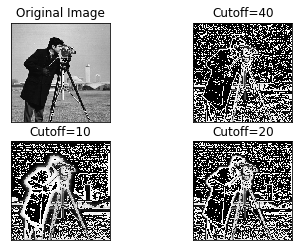

In [2]:
#gaussian high pass filter

import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('camera.png',0)
min = np.minimum(img.shape[0], img.shape[1])
img = cv2.resize(img, (min, min))
img[img >= 225] = 0
M, N = img.shape
# computing the 2-d fourier transformation of the image
fourier_image = np.fft.fft2(img)
u = np.array(range(0, M))
v = np.array(range(0, N))
idx = np.where(u > (M / 2))
u[idx] = u[idx] - M
idy = np.where(v > N / 2)
v[idy] = v[idy] - N
[V, U] = np.meshgrid(v, u)
D = (U ** 2 + V ** 2) ** (1 / 2)
# cutoff = 40
cutoff = [50, 40, 20, 10]
H = 1 - np.exp(((-1)*(D**2))/(2*((cutoff[1])**2)))
G = H * fourier_image
imback = np.fft.ifft2(G)
imback = np.uint8(np.real(imback))
H1 = 1- np.exp(((-1)*(D**2))/(2*((cutoff[3])**2)))
G1 = H1 * fourier_image
imback1 = np.fft.ifft2(G1)
imback1 = np.uint8(np.real(imback1))
H2 = 1- np.exp(((-1) * (D ** 2)) / (2 * ((cutoff[2]) ** 2)))
G2 = H2 * fourier_image
imback2 = np.fft.ifft2(G2)
imback2 = np.uint8(np.real(imback2))
plt.subplot(221), plt.imshow(img, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(222), plt.imshow(imback, cmap='gray')
plt.title('Cutoff=40'), plt.xticks([]), plt.yticks([])
plt.subplot(223), plt.imshow(imback1, cmap='gray')
plt.title('Cutoff=10'), plt.xticks([]), plt.yticks([])
plt.subplot(224), plt.imshow(imback2, cmap='gray')
plt.title('Cutoff=20'), plt.xticks([]), plt.yticks([])
plt.show()
